In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import matlib
from thresholding import*
import random
import re

In [43]:
#AMS data sets
df_sim = pd.read_csv(r'C:\Users\Invitado\Documents\Python\DS_MASTER\City_Adam_Intern\df_sim_img.csv')
df_sim['ids'] = list(zip(df_sim.ListingId_1, df_sim.ListingId_2))
df_full = pd.read_csv(r'C:\Users\Invitado\Documents\Python\DS_MASTER\City_Adam_Intern\merged_clean_df.csv')
df_full.drop('Unnamed: 0',axis=1,inplace=True)


#Baselines fully labeled
df_base_train = pd.read_csv(r'C:\Users\Invitado\Documents\Python\DS_MASTER\City_Adam_Intern\UnsupervisedBootAL-master\datasets\wdc_product\features_phones_phones_catalog_train')
df_base_test = pd.read_csv(r'C:\Users\Invitado\Documents\Python\DS_MASTER\City_Adam_Intern\UnsupervisedBootAL-master\datasets\wdc_product\features_phones_phones_catalog_test')

In [44]:
df_base_train.rename(columns = {'pair_id':'ids'}, inplace = True)
df_base_test.rename(columns = {'pair_id':'ids'}, inplace = True)
full_base =  pd.concat([df_base_train,df_base_test], axis=0)

In [28]:
def compare(df,id_1,id_2):
    #Compare URLS
    print(df['listing_url'][df['ListingId']==id_1])
    #print(df[df['ListingId']==id_1].values)
    print(df['listing_url'][df['ListingId']==id_2])
    #print(df[df['ListingId']==id_2].values)
    return 
compare(df_full,41709087,41339519)
      

15339    https://www.airbnb.nl/rooms/41709087
Name: listing_url, dtype: object
15209    https://www.airbnb.nl/rooms/41339519
Name: listing_url, dtype: object


In [45]:
sorted_dataset = scoring_unsupervised(df_sim,baseline=False)
sorted_dataset_base = scoring_unsupervised(full_base,baseline=True)

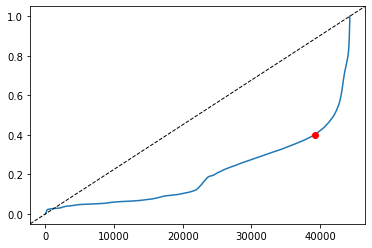

Knee of the curve is at index = 39221
Knee value = 0.4011926095121956


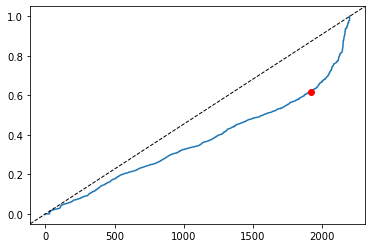

Knee of the curve is at index = 1925
Knee value = 0.6190547717236742


In [46]:
threshold,index = elbow_threshold(sorted_dataset) 
threshold_base,index_base = elbow_threshold(sorted_dataset_base) 

In [47]:
matches_score_weight, nonmatches_score_weight = unsupervised_labels(sorted_dataset,threshold)
matches_score_weight_base, nonmatches_score_weight_base = unsupervised_labels(sorted_dataset_base,threshold_base)

In [48]:
columns = ['ids','agg_score','weights','uns_label']
uns_labels = matches_score_weight+nonmatches_score_weight
df_uns = pd.DataFrame(uns_labels,columns=columns)
df_uns 

,ids,agg_score,weights,uns_label
0,"(9903960, 21989969)",0.401193,0.000000,1.0
1,"(6264293, 35396160)",0.401218,0.000042,1.0
2,"(17428515, 1162769)",0.401262,0.000117,1.0
3,"(39904405, 1113862)",0.401271,0.000131,1.0
4,"(42289164, 29953708)",0.401320,0.000212,1.0
...,...,...,...,...
44332,"(6942100, 6675077)",0.401126,0.000166,0.0
44333,"(7357862, 26271194)",0.401148,0.000111,0.0
44334,"(33539827, 15984970)",0.401153,0.000098,0.0
44335,"(53505795, 47371801)",0.401162,0.000076,0.0


In [49]:
columns_base = ['ids','agg_score','weights','uns_label']
uns_labels_base = matches_score_weight_base+nonmatches_score_weight_base
df_uns_base = pd.DataFrame(uns_labels_base,columns=columns_base)
df_uns_base

,ids,agg_score,weights,uns_label
0,http://dws.products.wdc/node3566ad9489c57f9f5f...,0.619055,0.000000,1.0
1,http://dws.products.wdc/node58ed727e945adbead7...,0.620203,0.003015,1.0
2,http://dws.products.wdc/node129ecaaf6c73f6771f...,0.620231,0.003088,1.0
3,http://dws.products.wdc/node2bc76a166178e2a7a4...,0.621105,0.005383,1.0
4,http://dws.products.wdc/nodef8ad5ee0be82c8b835...,0.622553,0.009182,1.0
...,...,...,...,...
2197,http://dws.products.wdc/nodeda95658608d772fe1c...,0.617827,0.001984,0.0
2198,http://dws.products.wdc/node7988ba2b263651ecd5...,0.618432,0.001006,0.0
2199,http://dws.products.wdc/node12bf19db5244369270...,0.618827,0.000368,0.0
2200,http://dws.products.wdc/nodec5e3616d1f2cb391b6...,0.618950,0.000170,0.0


In [23]:
df_uns_label= df_sim.merge(df_uns,on='ids')
df_uns_label.to_csv('df_uns_label_img_1.csv',index=False)

In [50]:
df_uns_label_base= full_base.merge(df_uns_base,on='ids')
df_uns_label_base.to_csv('df_uns_label_base_train.csv',index=False)

In [24]:
df_uns_label

,ListingId_1,ListingId_2,Name_jaro_winker,Name_levenshtein_sim,Name_jaccard_sim,Name_relaxed_jaccard_sim,Name_overlap_sim,Name_containment_sim,Bedrooms_binary,Bedrooms_numerical,...,Star_rating_binary,Star_rating_numerical,Xl_picture_url_img,LaBSE_emb_LaBSE_cos,Descrp_tfidf_tf_idf_cos,Lat_Lng_geo,ids,agg_score,weights,uns_label
0,10043980,10025641,0.976471,0.941176,0.714286,0.714286,0.0,0.833333,1.0,1.0,...,1.0,1.00000,0.999709,0.936309,0.988256,0.972364,"(10043980, 10025641)",0.897852,0.829414,1.0
1,10044256,10025641,0.988235,0.970588,0.714286,0.714286,0.0,0.833333,1.0,1.0,...,1.0,1.00000,0.998886,0.999702,0.998728,0.956031,"(10044256, 10025641)",0.911078,0.851502,1.0
2,10044256,10043980,0.976471,0.941176,0.714286,0.714286,0.0,0.833333,1.0,1.0,...,1.0,1.00000,0.998843,0.936287,0.989496,0.972462,"(10044256, 10043980)",0.883966,0.806225,1.0
3,10145992,10025641,0.988235,0.970588,0.714286,0.714286,0.0,0.833333,1.0,1.0,...,1.0,1.00000,0.989987,0.845712,0.964040,0.930090,"(10145992, 10025641)",0.849651,0.748919,1.0
4,10145992,10044256,0.988235,0.970588,0.714286,0.714286,0.0,0.833333,1.0,1.0,...,1.0,1.00000,0.990425,0.847703,0.962973,0.932911,"(10145992, 10044256)",0.862754,0.770801,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44332,5315586,20757123,0.427575,0.333333,0.000000,0.166667,0.0,0.000000,0.0,0.0,...,-1.0,-1.00000,0.995385,0.797381,-1.000000,0.984002,"(5315586, 20757123)",0.238787,0.404807,0.0
44333,5315586,27795712,0.662645,0.333333,0.000000,0.125000,0.0,0.000000,0.0,0.0,...,0.0,0.69697,0.997954,0.777321,-1.000000,0.982979,"(5315586, 27795712)",0.285751,0.287747,0.0
44334,50452179,50451988,0.915705,0.769231,0.500000,0.500000,0.0,0.666667,1.0,1.0,...,0.0,0.69697,1.000000,0.976764,-1.000000,0.991118,"(50452179, 50451988)",0.706566,0.509970,1.0
44335,25853345,25433802,0.657520,0.204545,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,-1.0,-1.00000,0.996721,0.932478,0.158012,0.943027,"(25853345, 25433802)",0.695347,0.491234,1.0


In [51]:
df_uns_label_base

,source_id,target_id,ids,label,cosine_tfidf,<http://schema.org/Product/phone_carrier>_lev,<http://schema.org/Product/phone_carrier>_jaccard,<http://schema.org/Product/phone_carrier>_relaxed_jaccard,<http://schema.org/Product/phone_carrier>_overlap,<http://schema.org/Product/phone_carrier>_containment,...,<http://schema.org/Product/front_cam_resolution>_overlap,<http://schema.org/Product/front_cam_resolution>_containment,<http://schema.org/Product/product_type>_lev,<http://schema.org/Product/product_type>_jaccard,<http://schema.org/Product/product_type>_relaxed_jaccard,<http://schema.org/Product/product_type>_overlap,<http://schema.org/Product/product_type>_containment,agg_score,weights,uns_label
0,http://dws.products.wdc/nodea5d4db945aebe16d83...,http://dws.products.catalog/f7b18a6d-8abc-4372...,http://dws.products.wdc/nodea5d4db945aebe16d83...,True,0.214443,-1.0000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.515955,0.166543,0.0
1,http://dws.products.wdc/nodeddfaf342e553eb3ed7...,http://dws.products.catalog/20fafb44-45fc-43ae...,http://dws.products.wdc/nodeddfaf342e553eb3ed7...,True,0.448177,-1.0000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.324946,0.475093,0.0
2,http://dws.products.wdc/node3566ad9489c57f9f5f...,http://dws.products.catalog/43ae8958-9d57-41fe...,http://dws.products.wdc/node3566ad9489c57f9f5f...,True,0.431848,-1.0000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,0.980193,0.948005,1.0
3,http://dws.products.wdc/node55289a35c396b0c12b...,http://dws.products.catalog/20fafb44-45fc-43ae...,http://dws.products.wdc/node55289a35c396b0c12b...,True,0.320956,-1.0000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.575401,0.070516,0.0
4,http://dws.products.wdc/node79c0148995a9fa6594...,http://dws.products.catalog/9e1bd633-daef-4aa1...,http://dws.products.wdc/node79c0148995a9fa6594...,True,0.201448,-1.0000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.572864,0.074615,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,http://dws.products.wdc/node9a9c8d58b92aecefe4...,http://dws.products.catalog/9d6d80b5-cc25-4f52...,http://dws.products.wdc/node9a9c8d58b92aecefe4...,False,0.003960,0.0625,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0.5,0.0,0.0,0.0,0.0,0.031459,0.949183,0.0
2198,http://dws.products.wdc/node769ce3c43235b12058...,http://dws.products.catalog/2aecdf00-c852-4f04...,http://dws.products.wdc/node769ce3c43235b12058...,False,0.025390,-1.0000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.105162,0.830124,0.0
2199,http://dws.products.wdc/node06edc149e3ceee41df...,http://dws.products.catalog/f64ddc54-7fe9-490e...,http://dws.products.wdc/node06edc149e3ceee41df...,False,0.083605,-1.0000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.103704,0.832481,0.0
2200,http://dws.products.wdc/node2295d9baf9ae6e5a6a...,http://dws.products.catalog/f7b18a6d-8abc-4372...,http://dws.products.wdc/node2295d9baf9ae6e5a6a...,False,0.150618,-1.0000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,0.490353,0.207900,0.0
